# How are in-demand skills are trending for Data Analysts?

### Methodology
1. Aggregate skills count monthly
2. Re-analysed based on percentage of total jobs
3. Plot the monthly skill demand

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vikra\Desktop\Data analyst Luke\python\3_project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'India')]
df_DA_India.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."


In [4]:
# we are going to analyse the trend by month so creating month no column
df_DA_India['job_posted_month_no'] = df_DA_India['job_posted_date'].dt.month

C:\Users\vikra\AppData\Local\Temp\ipykernel_15016\3195213223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_India['job_posted_month_no'] = df_DA_India['job_posted_date'].dt.month


In [5]:
df_DA_India_explode = df_DA_India.explode('job_skills')

In [6]:
df_DA_India_pivot = df_DA_India_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_India_pivot.loc['total'] = df_DA_India_pivot.sum()

In [7]:
df_DA_India_pivot = df_DA_India_pivot[df_DA_India_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_India_pivot = df_DA_India_pivot.drop('total')

<Axes: xlabel='job_posted_month_no'>

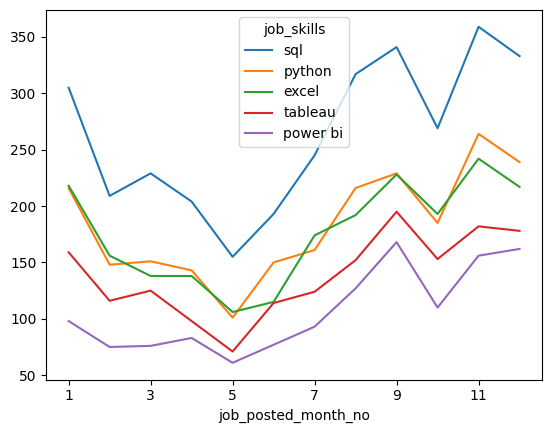

In [8]:
df_DA_India_pivot.iloc[:,:5].plot(kind='line')

In [9]:
DA_totals = df_DA_India.groupby('job_posted_month_no').size()

In [10]:
df_DA_India_percent = df_DA_India_pivot.div(DA_totals/100,axis=0)

In [11]:
df_DA_India_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.0,0.000000,0.000000,0.00000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.236967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.359712,0.000000,0.000000,0.000000,0.000000,0.0,0.359712,0.000000,0.00000
6,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.27248
7,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
8,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
9,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000


In [12]:
#change month no to month name
df_DA_India_percent = df_DA_India_percent.reset_index()
df_DA_India_percent['job_posted_month'] = df_DA_India_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_India_percent = df_DA_India_percent.set_index('job_posted_month')
df_DA_India_percent = df_DA_India_percent.drop(columns='job_posted_month_no')



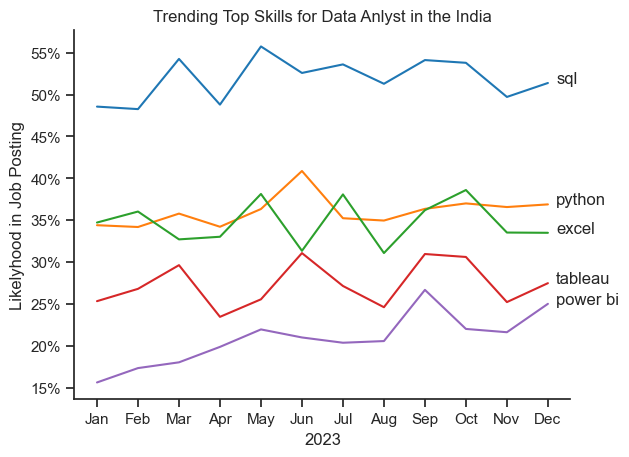

In [26]:
df_plot = df_DA_India_percent.iloc[:,:5] #slicing top 5 skills by column

sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove the graph outline

plt.title('Trending Top Skills for Data Anlyst in the India')
plt.ylabel('Likelyhood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

# for displaying y axis values as percentage
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))  

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])